# Part 2. Supervised Learning - Classification

## 1. Understanding Data set

### 1.1. Download ObesityDataSet

In [223]:
# Library import
from ucimlrepo import fetch_ucirepo
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Data import
overweight_data = pd.read_csv('ObesityDataSet.csv')

In [207]:
overweight_data

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation,Normal_Weight
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation,Normal_Weight
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking,Overweight_Level_I
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


### 1.2. Checking Data

#### Data Frame

In [208]:
# 데이터프레임 정보 확인
print(overweight_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

#### Categorical Data

In [209]:
# 각 열에 대한 고유한 값들의 종류를 저장할 딕셔너리 생성
unique_values_dict = {}

# 번호를 1부터 시작하기 위한 변수
count = 1

# 'categorical_column' 열의 값들의 종류 확인
# 데이터프레임의 열 순회
for column in overweight_data.columns:
    # 열의 데이터 타입이 숫자형이 아닌 경우에만 처리
    if not pd.api.types.is_numeric_dtype(overweight_data[column]):
        # 열의 이름 출력
        print(f"{count}. {column}:")
        # 열의 값들의 종류 저장
        unique_values_dict[column] = overweight_data[column].unique()
        # 열의 값들 출력
        for idx, value in enumerate(unique_values_dict[column]):
            print(f"  {idx+1}. {value}")
        # 한 줄 띄우기
        print()
        # 다음 번호로 증가
        count += 1

1. Gender:
  1. Female
  2. Male

2. family_history_with_overweight:
  1. yes
  2. no

3. FAVC:
  1. no
  2. yes

4. CAEC:
  1. Sometimes
  2. Frequently
  3. Always
  4. no

5. SMOKE:
  1. no
  2. yes

6. SCC:
  1. no
  2. yes

7. CALC:
  1. no
  2. Sometimes
  3. Frequently
  4. Always

8. MTRANS:
  1. Public_Transportation
  2. Walking
  3. Automobile
  4. Motorbike
  5. Bike

9. NObeyesdad:
  1. Normal_Weight
  2. Overweight_Level_I
  3. Overweight_Level_II
  4. Obesity_Type_I
  5. Insufficient_Weight
  6. Obesity_Type_II
  7. Obesity_Type_III



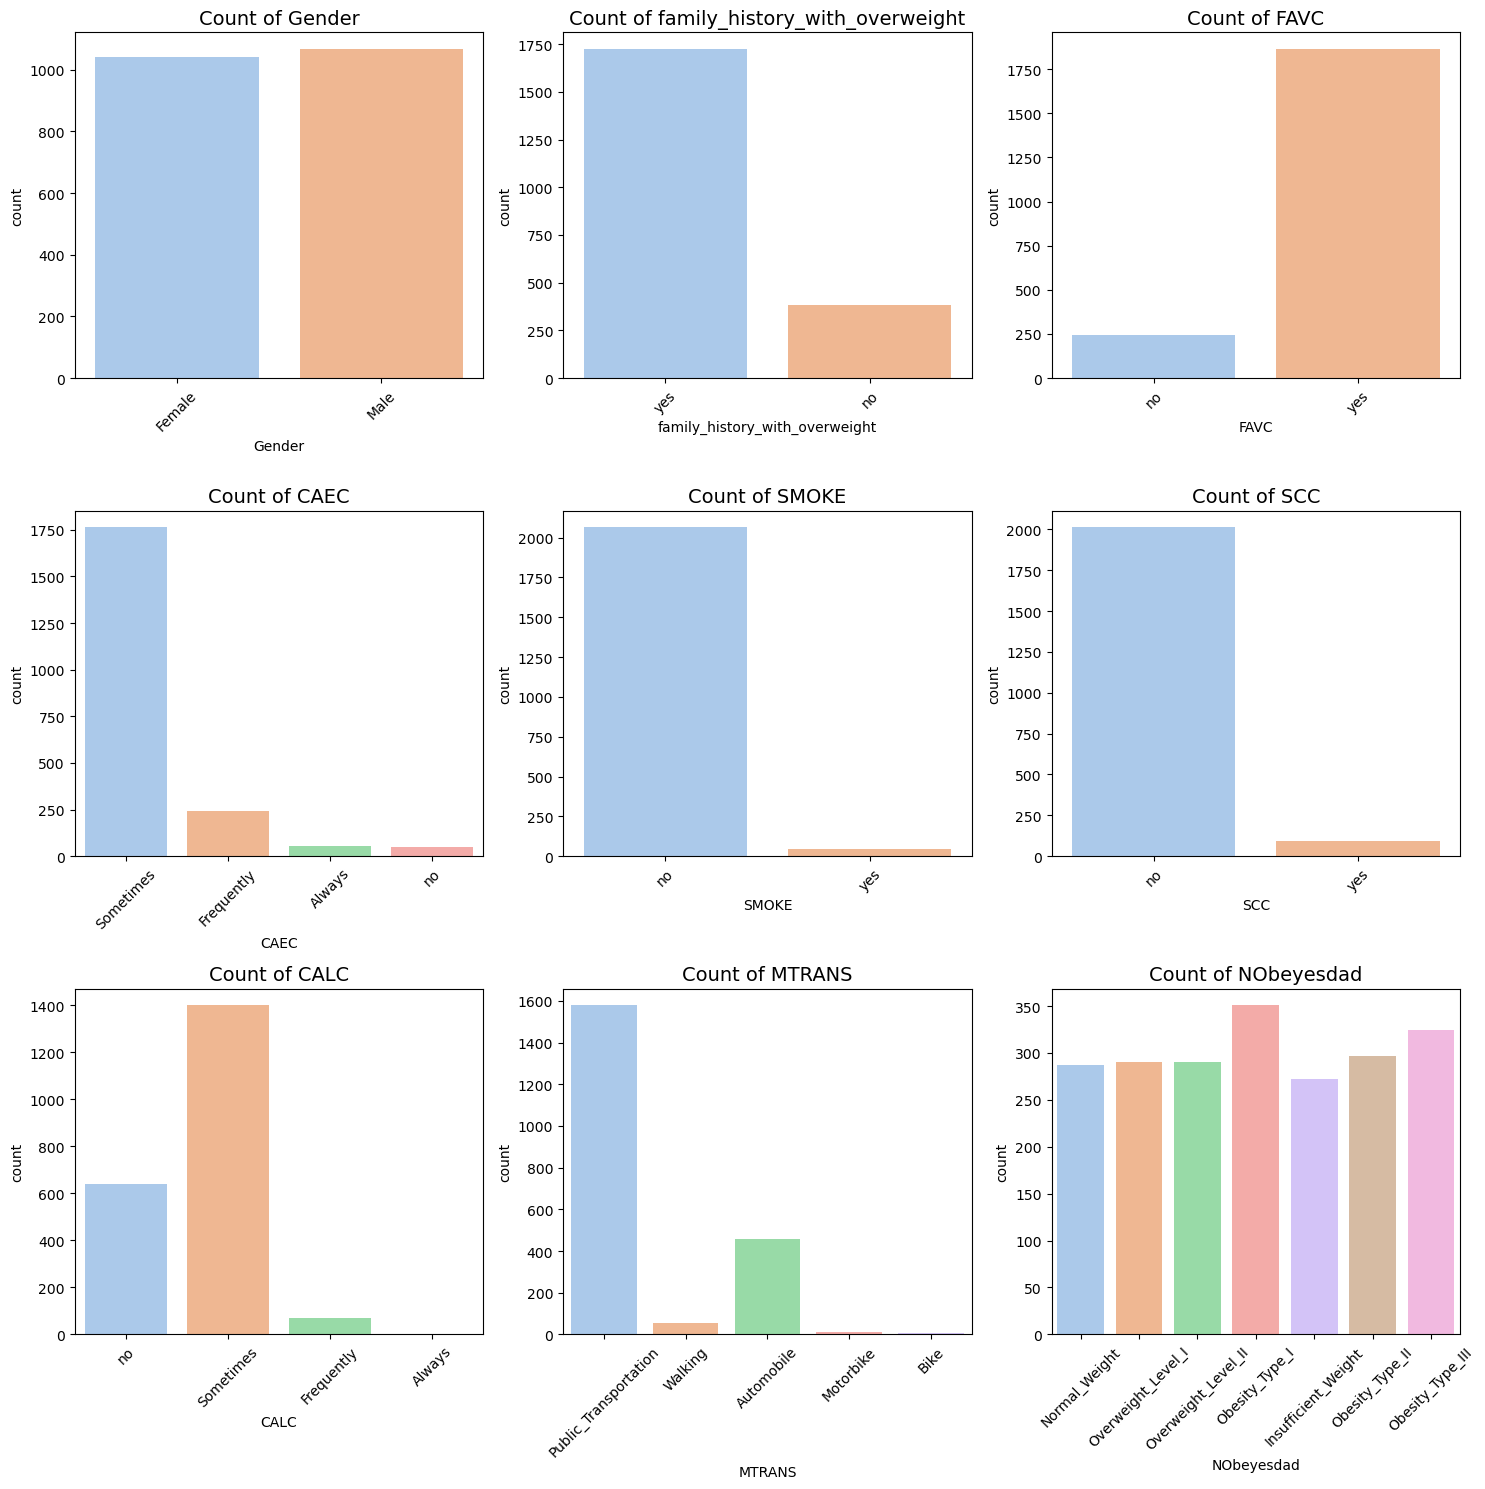

In [210]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프를 모두 담을 Figure 객체와 Axes 객체 생성
num_rows = 3
num_cols = 3
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))

# 'categorical_column' 열의 값들의 종류 확인
# 데이터프레임의 열 순회
count = 1
for column in overweight_data.columns:
    # 열의 데이터 타입이 숫자형이 아닌 경우에만 처리
    if not pd.api.types.is_numeric_dtype(overweight_data[column]):
        # 해당 열에 대한 카운트 플롯 그리기
        row = (count - 1) // num_cols
        col = (count - 1) % num_cols
        sns.countplot(x=column, data=overweight_data, palette="pastel", ax=axes[row, col])
        axes[row, col].set_title(f'Count of {column}', fontsize=14)  # 타이틀 텍스트 크기 조정
        axes[row, col].tick_params(axis='x', labelrotation=45, labelsize=10)  # x 축 라벨 회전 및 크기 조정
        axes[row, col].tick_params(axis='y', labelsize=10)  # y 축 라벨 크기 조정
        count += 1

# 그래프들 간의 간격 조정
plt.tight_layout()
plt.show()

#### Correlation

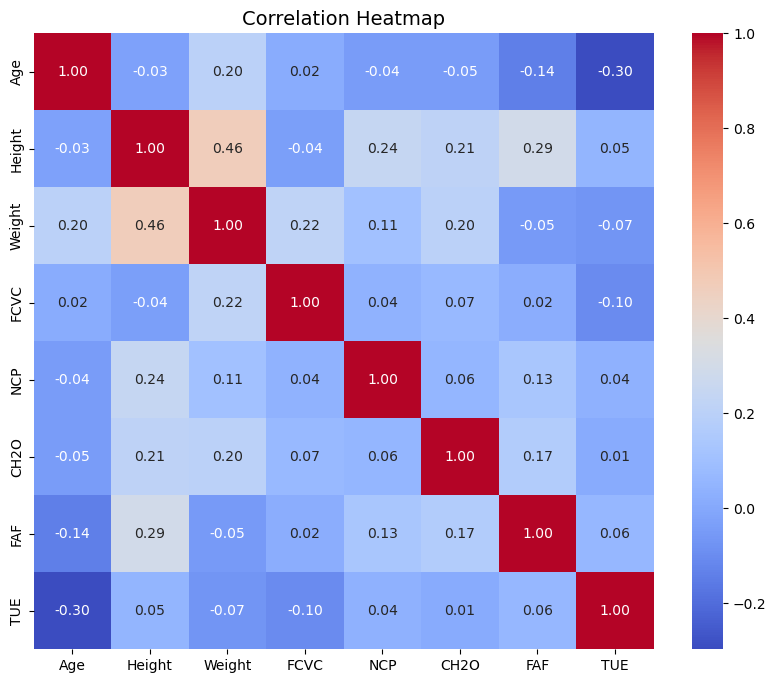

In [211]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관 행렬 계산
corr_matrix = overweight_data.corr(numeric_only=True)

# heatmap 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True, fmt=".2f", annot_kws={"size": 10})
plt.title("Correlation Heatmap", fontsize=14)
plt.show()

## 2. Data Preprocessing

 ### 2.1. Encoding  Non-Numerical Data

####  Case 1.Nominal Data(Non Ordinary)

In [212]:
# Imitate One-Hot Encoding

# Gender
overweight_data = pd.get_dummies(overweight_data, columns=['Gender'])

# FAVC (자주 채식주의 음식을 섭취하는가)
overweight_data = pd.get_dummies(overweight_data, columns=['FAVC'])

# SMOKE(흡연 여부)
overweight_data = pd.get_dummies(overweight_data, columns=['SMOKE'])

# SCC(일일 생활 습관 관리 빈도, yse or no)
overweight_data = pd.get_dummies(overweight_data, columns=['SCC'])

# MTRANS (이동 수단: 'Automobile', 'Motorbike', 'Bike', 'Public_Transportation', 'Walking')
overweight_data = pd.get_dummies(overweight_data, columns=['MTRANS'])

# family_history_with_overweight(과체중 가족력)
overweight_data = pd.get_dummies(overweight_data, columns=['family_history_with_overweight'])

#### Case 2. Ordinal data

In [213]:
# Replae categorical data with numerical data, different weight

# CAEC (식사 간 간식 섭취 빈도)
#overweight_data = pd.get_dummies(overweight_data, columns=['CAEC'])
overweight_data['CAEC'] = overweight_data['CAEC'].replace({'no': 0,'Sometimes': 1,'Frequently': 2,'Always': 3})

# CALC (일일 칼로리 소비량 모니터링: 'no', 'Sometimes', 'Frequently', 'Always')
#overweight_data = pd.get_dummies(overweight_data, columns=['CALC'])
overweight_data['CALC'] = overweight_data['CALC'].replace({'no': 0,'Sometimes': 1,'Frequently': 2,'Always': 3})

#### Case 2-1. Target data

In [214]:
# Set Categorical Target data into numerical data

# NObeyesdad(level of obesity state: 'Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_II', 'Overweight_Level_I', 'Obesity_Type_II', 'Obesity_Type_III', 'Obesity_Type_I')
overweight_data['NObeyesdad'] = overweight_data['NObeyesdad'].replace({'Insufficient_Weight': 0, 'Normal_Weight': 1, 'Overweight_Level_II': 2, 'Overweight_Level_I': 3, 'Obesity_Type_II': 4, 'Obesity_Type_III': 5, 'Obesity_Type_I': 6})

### 2.2. Data Scaling

In [215]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler 객체 생성
scaler = MinMaxScaler()

# 'NObeyesdad'를 제외한 feature data만 추출
features = overweight_data.drop(columns=['NObeyesdad'])

# MinMaxScaler 적용
features_minMax = scaler.fit_transform(features)

# MinMaxScaled feature 데이터를 DataFrame으로 변환
features_df = pd.DataFrame(features_minMax, columns=features.columns)

# feature 데이터와 'NObeyesdad' 결합하여 하나의 데이터셋 생성
final_overweight_data = pd.concat([features_df, overweight_data['NObeyesdad']], axis=1)

In [216]:
final_overweight_data

,Age,Height,Weight,FCVC,NCP,CAEC,CH2O,FAF,TUE,CALC,...,SCC_no,SCC_yes,MTRANS_Automobile,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking,family_history_with_overweight_no,family_history_with_overweight_yes,NObeyesdad
0,0.148936,0.320755,0.186567,0.5,0.666667,0.333333,0.500000,0.000000,0.500000,0.000000,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
1,0.148936,0.132075,0.126866,1.0,0.666667,0.333333,1.000000,1.000000,0.000000,0.333333,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,0.191489,0.660377,0.283582,0.5,0.666667,0.333333,0.500000,0.666667,0.500000,0.666667,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
3,0.276596,0.660377,0.358209,1.0,0.666667,0.333333,0.500000,0.666667,0.000000,0.666667,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,3
4,0.170213,0.622642,0.379104,0.5,0.000000,0.333333,0.500000,0.000000,0.000000,0.333333,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0.148443,0.491943,0.689616,1.0,0.666667,0.333333,0.364070,0.558756,0.453124,0.333333,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5
2107,0.169850,0.563366,0.707037,1.0,0.666667,0.333333,0.502565,0.447130,0.299635,0.333333,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5
2108,0.181362,0.570200,0.706637,1.0,0.666667,0.333333,0.527097,0.471403,0.323144,0.333333,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5
2109,0.220467,0.546132,0.704079,1.0,0.666667,0.333333,0.926170,0.379702,0.293017,0.333333,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,5


## 2.2. Middle Checking

### 2.2.1. Checking Correlation between Target Data and Others

In [217]:
# 'overweight_data'의 각 열과 'NObeyesdad' 열 간의 상관관계 계산
correlations = final_overweight_data.corr()['NObeyesdad'].drop('NObeyesdad')

# 상관관계를 내림차순으로 정렬
correlations_sorted = correlations.sort_values(ascending=False)

# 결과 출력
print(correlations_sorted)

Weight                                0.741384
family_history_with_overweight_yes    0.459742
FAVC_yes                              0.278537
Age                                   0.247464
SCC_no                                0.154936
CH2O                                  0.152567
CALC                                  0.087673
FCVC                                  0.073456
Height                                0.064963
MTRANS_Public_Transportation          0.036256
Gender_Female                         0.025778
MTRANS_Automobile                     0.020617
SMOKE_no                              0.009252
SMOKE_yes                            -0.009252
MTRANS_Motorbike                     -0.018451
Gender_Male                          -0.025778
MTRANS_Bike                          -0.032901
NCP                                  -0.062796
TUE                                  -0.087560
MTRANS_Walking                       -0.130694
SCC_yes                              -0.154936
FAF          

## 3. Divide Preprocessed Data into Train & Test Set

In [218]:
# 먼저 훈련 데이터와 임시 데이터로 분할
X_train_val, X_test, y_train_val, y_test = train_test_split(final_overweight_data.drop('NObeyesdad', axis=1), final_overweight_data['NObeyesdad'], test_size=test_ratio, random_state=24)

# train:validation:test = 7:1:2
# 나머지 데이터를 훈련 세트와 검증 세트로 분할
relative_validation_ratio = validation_ratio / (train_ratio + validation_ratio)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=relative_validation_ratio, random_state=24)

# 결과 확인
print("Train 데이터셋 크기:", X_train.shape[0])
print("Validation 데이터셋 크기:", X_val.shape[0])
print("Test 데이터셋 크기:", X_test.shape[0])

Train 데이터셋 크기: 1476
Validation 데이터셋 크기: 212
Test 데이터셋 크기: 423


## 4. Model Learning

### 4.1. MLP

In [233]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# MLP 모델 생성 및 훈련 (max_iter를 1000으로 설정)
mlp_model = MLPClassifier(max_iter= 1000)
mlp_model.fit(X_train, y_train)

# 검증 세트를 사용하여 모델 평가
validation_predictions = mlp_model.predict(X_val)
validation_accuracy = accuracy_score(y_val, validation_predictions)  # 실제 레이블과 예측된 레이블 인자 추가
print("검증 세트 정확도:", validation_accuracy)

# 테스트 세트를 사용하여 최종 모델 평가
test_predictions = mlp_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)  # 실제 레이블과 예측된 레이블 인자 추가
print("테스트 세트 정확도:", test_accuracy)

# 혼동 행렬 생성 및 출력
conf_matrix = confusion_matrix(y_test, test_predictions)  # 실제 레이블과 예측된 레이블 인자 추가
print("Confusion Matrix:")
print(conf_matrix)

검증 세트 정확도: 0.9575471698113207
테스트 세트 정확도: 0.9408983451536643
Confusion Matrix:
[[46  1  0  0  0  0  0]
 [ 2 45  2  6  0  0  0]
 [ 0  0 60  3  0  0  0]
 [ 0  3  3 49  0  0  0]
 [ 0  0  0  0 69  0  1]
 [ 0  0  0  0  1 56  0]
 [ 0  0  3  0  0  0 73]]


C:\Users\NohYunKi\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


### 4.2. Random Forest

In [220]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Random Forest 모델 생성 및 훈련
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# 검증 세트를 사용하여 모델 평가
validation_predictions = rf_model.predict(X_val)
validation_accuracy = accuracy_score(y_val, validation_predictions)
print("검증 세트 정확도:", validation_accuracy)

# 테스트 세트를 사용하여 최종 모델 평가
test_predictions = rf_model.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)
print("테스트 세트 정확도:", test_accuracy)

# 혼동 행렬 생성 및 출력
conf_matrix = confusion_matrix(y_test, test_predictions)
print("Confusion Matrix:")
print(conf_matrix)

검증 세트 정확도: 0.9386792452830188
테스트 세트 정확도: 0.9456264775413712
Confusion Matrix:
[[44  3  0  0  0  0  0]
 [ 1 53  0  1  0  0  0]
 [ 0  1 61  0  0  0  1]
 [ 0  6  3 46  0  0  0]
 [ 0  0  0  0 70  0  0]
 [ 0  0  0  0  1 56  0]
 [ 0  0  5  0  1  0 70]]
